In [ ]:
pip install demoji

In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=bdb2e0f78c096cc853694decff87f29742427ffab11db594140878e2a284bc99
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
pip install squarify

In [ ]:
%%bash
pip install --upgrade git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
pip install wordcloud
wget -nc -qq https://www.wfonts.com/download/data/2016/04/23/symbola/symbola.zip
unzip -qqo symbola.zip

  Cloning https://github.com/nexxt-intelligence/DeepMoji (to revision tf-keras) to /tmp/pip-req-build-1zoggk2c
  Created wheel for deepmoji: filename=deepmoji-1.1-cp36-none-any.whl size=365736475 sha256=116bae6c410f9a1df9b29f26c3f00e7dfc1d38a83cbb2fefdebcd2637840093c
  Stored in directory: /tmp/pip-ephem-wheel-cache-x_7iy62q/wheels/59/24/cb/d380c5b5be45e491b02395908a02fda52712ded2b90d2ef405
  Created wheel for emoji: filename=emoji-0.4.5-cp36-none-any.whl size=38200 sha256=e99e42dcaf017d4167ad9df6e238328ef275a3131504806aec95e7a504401c6a
  Stored in directory: /root/.cache/pip/wheels/82/5f/75/d3b84d3c13409f43533b70af38ca20abb09f7ffb0aaf051e33
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=9025578de7d1f403b49632876f4e7a2a67bcfc626a43cffc2a76df80f8322810
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built deepmoji emoji gast
  Found existing installation: emoji 0.6.0
    Uninstallin

  Running command git clone -q https://github.com/nexxt-intelligence/DeepMoji /tmp/pip-req-build-1zoggk2c
  Running command git checkout -b tf-keras --track origin/tf-keras
  Switched to a new branch 'tf-keras'
  Branch 'tf-keras' set up to track remote branch 'tf-keras' from 'origin'.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


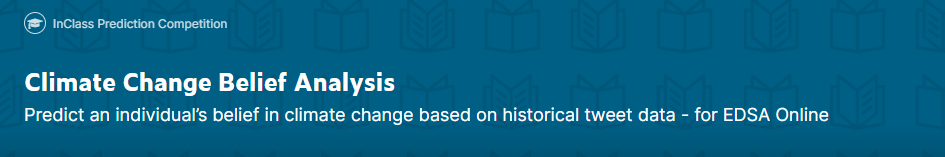

# **Introduction**

##### **Project Description**

# **Problem Statement**

In [ ]:
# This will be provided after everyone has written one and submitted on Trello



*   [Trello Link](https://trello.com/b/msPfxSBY/team1classifiers)
*   Link to comet



[](http://)

# **Table of Contents**
- Import Libraries and load files
- Evaluating Raw data
- Tweets Data Preprocessing and Cleaning
    - Create a copy
    - Hashtag extraction
    - Twitter handles extraction
    - Tweet cleaning
    - Speech tagging
    - Word frequency
- Exploratory Data Analysis
    - Target variable distribution
    - Tweet length distribution
    - Climate change buzzwords
    - Hashtags
    - People, places and organizations to watch
- Model Building: Sentimental Analysis
    - Train-validation split
    - Pipelines
    - Train models
    - Evaluate the Base Model Performance
- Model Evaluation : Classifiers
    - Logistic regression
    - Naive Bayes
    - Gradient Boosting Classifier
    - K nearest neighbors
    - Random forest 
    - Linear SVC
    - Support Vector Machines
    - Decision Tree Classifiers/Random Forests
    - Linear Discriminant Analysis
- Evaluating the Classifier for Selection
    - Classification Accuracy
    - Logarithmic Loss
    - Area Under ROC Curve (AUC)
    - Confusion Matrix
    - Classification Report
- Hyperparameter tuning
- Submission
- Conclusion
- Collaborators








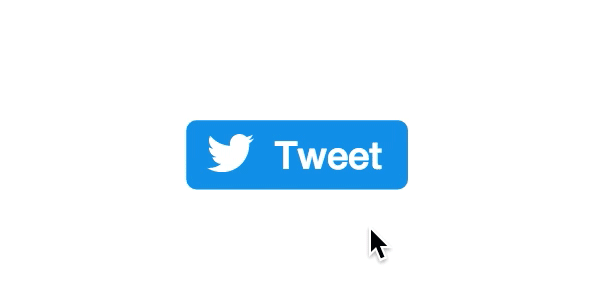

In [ ]:
# importing comet_ml
from comet_ml import Experiment
    
experiment = Experiment(
    api_key="HMrbLtwTWvfD9ZZURW09l1p8x",
    project_name="general",
    workspace="malibongwe-xulu",
)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/lazolajavu/general/c9572c6f8ab64b06944af1e2103f20c0



# Import Libraries and load files
**Importing all the necessary data processing, vizualization, and machine learning model libraries that we are going to use through out the notebook.**

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
#emoji cloud
from deepmoji import DeepMoji
import string
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import emoji


warnings.filterwarnings("ignore", category=DeprecationWarning)
import nltk
#nltk.download('all')

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Evaluating Raw Data
**In total, 43943 tweets were collected.Each tweet is labelled and are divided into 4 classes:**

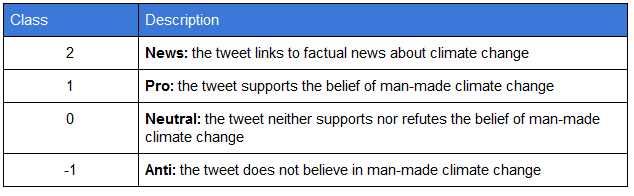

## Variable definitions


###  **Read in the Test and Train csv file as a DataFrame called test and train.**

**We are working with the train and test  csv file which can be accessed directly from the competition containing unique tweet Ids, sentiment and each tweet labeled message. :**

- tweetid – Unique number identifying each tweet message

- sentiment-Sentiment of tweet consisting of Class labels as per the data set description are labeled according to their description.

- message-Tweet body

In [ ]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# **Tweets Data Preprocessing and Cleaning** 
The preprocessing of the text data is an essential step as it makes the raw text ready for mining,it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data.

## **Preprocessing structure:**
 **As we are about to dive deep we will look into some preprocessing to get and understanding to get better insights.**
* Make a copy of the dataframe and rename the class labels for better visualisations

* create a columns of all the hashtags extracted from the trained data

* perform some mining on the data by extracting all the emojies.

* Demogize all emojis by translating them into text.

* Remove 'noisy entities' such as URL's, punctuations, handles, digits and extra white space.

* Tokenization

* Perform part of speech tagging (POS) and lemmatization

* make an analysis on the most common words on the data

* Specific named entity extraction

### **Create a copy of the Train dataset**

**We are going to create a copy of the train dataset and preseve the original Dataframe.**

In [ ]:
# Make a copy of the dataframe

df = train.copy()
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### **Create a copy of the Test dataset**

**We are going to create a copy of the test dataset and preseve the original Dataframe.**

In [ ]:
# Make a copy of the dataframe

df_test = test.copy()
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Group the sentiments into a new dataframe 
Group the sentiments into a new dataframe consisting of the number of sentiment count for each class label

In [ ]:
# Create class distribution dataframe
sentiment_counts = df.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts

,sentiment,counts
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


# Defining class Labels for each sentiment class
We create a function that will rename all the classes converting the numbers into words which will make our visuals more readable, each of the sentiment class is described below.

* ( 2 ) News : Tweets linked to factual news about climate change.

* ( 1 ) Pro : Tweets that support the belief of man-made climate change.

* ( 0 ) Neutral : Tweets that neither support nor refuse beliefs of climate change.

* (-1 ) Anti : Tweets that do not support the belief of man-made climate change..

In [ ]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 1 :
          sentiment_class.append('Pro')
      elif i == 0 :
          sentiment_class.append('Neutral')
      elif i == -1 :
          sentiment_class.append('Anti')
      else :
          sentiment_class.append('News')

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df)
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


## Group the sentiments into a new dataframe 
Group the sentiments into a new dataframe consisting of the number of sentiment count for the new class labels, this dataframe counts the number of observations for distinct values which helps us see the frequency of each sentiment.

In [ ]:
# Create class distribution dataframe
sentiment_counts = df.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts

,sentiment,counts
0,Anti,1296
1,Neutral,2353
2,News,3640
3,Pro,8530


## Hashtag Extractor of the train data for each message
create a columns of all the hashtags extracted from the trained data. This is usually implemented before we clean the tweets to ensure that no information is lost.

In [ ]:
# Extract the hashtags from the tweets

def extract_hashtags(df):
  df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
  df['hashtags'] = df['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df

extract_hashtags(df)

,sentiment,message,tweetid,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN
1,Pro,It's not like we lack evidence of anthropogeni...,126103,NaN
2,News,RT @RawStory: Researchers say we have three ye...,698562,NaN
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight]
...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,NaN
15815,News,RT @washingtonpost: How climate change could b...,17856,NaN
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,NaN
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,[#agenda2030.]


## Hashtag Extractor of the test data for each message
create a columns of all the hashtags extracted from the test data

In [ ]:
# Extract the hashtags from the tweets from the test data

def extract_hashtags(df_test):
  df_test['hashtags'] = df_test['message'].str.findall(r'#.*?(?=\s|$)')
  df_test['hashtags'] = df_test['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df_test

extract_hashtags(df_test)

,message,tweetid,hashtags
0,Europe will now be looking to China to make su...,169760,NaN
1,Combine this with the polling of staffers re c...,35326,NaN
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,"[#climatechange, #science, #poetry, #fakenews,..."
10542,2016: the year climate change came home: Durin...,875167,NaN
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,[#aldublaboroflove]


In [ ]:
# We look at the at the dataframe for train data
df.head()

,sentiment,message,tweetid,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN
1,Pro,It's not like we lack evidence of anthropogeni...,126103,NaN
2,News,RT @RawStory: Researchers say we have three ye...,698562,NaN
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight]


In [ ]:
# We look at the at the dataframe for train datatest
df_test

,message,tweetid,hashtags
0,Europe will now be looking to China to make su...,169760,NaN
1,Combine this with the polling of staffers re c...,35326,NaN
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,"[#climatechange, #science, #poetry, #fakenews,..."
10542,2016: the year climate change came home: Durin...,875167,NaN
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,[#aldublaboroflove]


## emoji extraction of the train data for each message

Function checks if a single codepoint is an emoji codepoint by checking if it is contained in emoji.UNICODE_EMOJI.

In [ ]:
# Create a function for emoji extraction
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [ ]:
#extracting emojis on train data
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']!='']['emoji']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emoji, Length: 182, dtype: object

## emoji extraction of the test data for each message

In [ ]:
#extracting emojies on df_test data
df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']!='']['emoji']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emoji, Length: 120, dtype: object

In [ ]:
# Create the function to extract the emojis from data
def extract_emojis(df):
  for char in df:
    if char in emoji.UNICODE_EMOJI:
      return True
    else:
      return False

In [ ]:
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']==True]

,sentiment,message,tweetid,hashtags,emoji
3360,News,⚡️ “Meteorologist opens up about the struggle ...,223703,NaN,True
3773,Pro,❤The Taiwan government should apologize to the...,669951,NaN,True
5449,Pro,♥The Taiwan government should apologize to the...,373808,NaN,True
5916,Neutral,❤The Taiwan government should apologize to the...,364717,NaN,True
9515,News,📢 #ClimateChange \nPeople prepare to fight the...,687224,"[#climatechange, #krtpro, #news]",True
11454,Pro,♥The Taiwan government should apologize to the...,231605,NaN,True
15669,Pro,😠 SIGN to restore &amp; maintain accurate scie...,412158,NaN,True


In [ ]:
df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']==True]

,message,tweetid,hashtags,emoji
1127,♥The Taiwan government should apologize to the...,560795,NaN,True
2218,😅😆 DOE won't provide names of climate change s...,291525,[#trump],True
2603,▶@GreenPartyUS: We need to start taking climat...,407975,NaN,True
5186,♥The Taiwan government should apologize to the...,778694,NaN,True
5322,📷 frankunderwood: tfw you’re having a good tim...,515505,NaN,True
5668,⚡️ “Leonardo DiCaprio met with Donald Trump to...,219191,NaN,True
8500,♥The Taiwan government should apologize to the...,498187,NaN,True
9360,♥The Taiwan government should apologize to the...,857555,NaN,True


In [ ]:
#convert emojies on the dataframe to text 
def text_emoji(txt):
  emoji_converter = emoji.demojize(txt, delimiters=("", ""))
  return emoji_converter

# Converting emojies into Text

In [ ]:
#convert emojies on the dataframe to text from the train data
df['message'] = df['message'].apply(text_emoji)
df[df['emoji']==True]

,sentiment,message,tweetid,hashtags,emoji
3360,News,high_voltage “Meteorologist opens up about the...,223703,NaN,True
3773,Pro,red_heartThe Taiwan government should apologiz...,669951,NaN,True
5449,Pro,heart_suitThe Taiwan government should apologi...,373808,NaN,True
5916,Neutral,red_heartThe Taiwan government should apologiz...,364717,NaN,True
9515,News,loudspeaker #ClimateChange \nPeople prepare to...,687224,"[#climatechange, #krtpro, #news]",True
11454,Pro,heart_suitThe Taiwan government should apologi...,231605,NaN,True
15669,Pro,angry_face SIGN to restore &amp; maintain accu...,412158,NaN,True


In [ ]:
#convert emojies on the dataframe to text from the train data
df_test['message'] = df_test['message'].apply(text_emoji)
df_test[df_test['emoji']==True]

,message,tweetid,hashtags,emoji
1127,heart_suitThe Taiwan government should apologi...,560795,NaN,True
2218,grinning_face_with_sweatgrinning_squinting_fac...,291525,[#trump],True
2603,play_button@GreenPartyUS: We need to start tak...,407975,NaN,True
5186,heart_suitThe Taiwan government should apologi...,778694,NaN,True
5322,camera frankunderwood: tfw you’re having a goo...,515505,NaN,True
5668,high_voltage “Leonardo DiCaprio met with Donal...,219191,NaN,True
8500,heart_suitThe Taiwan government should apologi...,498187,NaN,True
9360,heart_suitThe Taiwan government should apologi...,857555,NaN,True


### Twitter Handles Extraction

In [ ]:
#removinging @handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [ ]:
# remove twitter handles (@user) from train data
df['message'] = np.vectorize(remove_pattern)(df['message'], "@[\w]*")


In [ ]:
# remove twitter handles (@user) from test data
df_test['message'] = np.vectorize(remove_pattern)(df_test['message'], "@[\w]*")

### Tweet Cleaning
The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

**Initial data cleaning requirements that we can think of after looking at the top 5 records:**

* We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
* Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
* A text cleaning function to clean funny symbols, hyperlinks and Retweets.
* The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
* Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.

In [ ]:
# remove special characters, numbers, punctuations from train data
df['message'] = df['message'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
# remove special characters, numbers, punctuations from test data
df_test['message'] = df_test['message'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
#removing short words from train data
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
#removing short words from train data
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
#define a function to remove the @mentions and other useless text from the tweets
def text_cleaning(text):

  text = re.sub(r'https?:\/\/.*\/\w*', '', text)
  text = re.sub('#(RT|rt)*', '', text) #Remove RT #s
  text = re.sub('\w*\d\w*','', text) #Remove Numbers and words with Num 
  text = re.sub(r'@[A-Za-z0-9]+', '', text)#removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)#removing @mentions
  text = re.sub(r'@[A-Za-z]+', '', text)#removing @mentions
  text = re.sub(r'@[-)]+', '', text)#removing @mentions
  text = re.sub(r'#', '', text)#removing #sign
  text = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', text)
  text = re.sub(r'&[a-z;]+','', text) # remove the '&gt;'
  text = re.sub(r'\s\s+', ' ', text)# Remove extra whitespace
  text = text.lstrip(' ') # Remove space in front of tweet
  
  text = re.sub(r"U+FFFD ", ' ', text)

  
  return text.lower()




In [ ]:
# cleaning the text of train data
df['message'] = df['message'].apply(lambda x: text_cleaning(x))

# show the cleaned text 
df.head()



,sentiment,message,tweetid,hashtags,emoji
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False
2,News,researchers have three years climate change be...,698562,NaN,False
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False


In [ ]:
# cleaning the text of test data
df_test['message'] = df_test['message'].apply(lambda x: text_cleaning(x))

# show the cleaned text 
df_test.head()


,message,tweetid,hashtags,emoji
0,europe will now be looking to china to make su...,169760,NaN,False
1,combine this with the polling of staffers re c...,35326,NaN,False
2,the scary unimpeachable evidence that climate ...,224985,"[#itstimetochange, #climatechange]",False
3,putin got to you too jill trump doesn t believ...,476263,NaN,False
4,rt female orgasms cause global warming sarcast...,872928,NaN,False


In [ ]:
#Remplace the word https with nothing: train
df['message'] = df['message'].str.replace('https', '')

In [ ]:
#Remplace the word https with nothing: test
df_test['message'] = df_test['message'].str.replace('https', '')

In [ ]:
# Remove Line breaks: train
df['message']=df['message'].replace('\n', ' ')


In [ ]:
# Remove Line breaks: test
test['message']=test['message'].replace('\n', ' ')


In [ ]:
#view change on train data
df['message'].unique()

array(['polyscimajor chief doesn think carbon dioxide main cause global warming wait what  yelvcefxkc',
       'like lack evidence anthropogenic global warming',
       'researchers have three years climate change before late  kdur  anpt',
       ...,
       'notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides ',
       'liberals climate change crap hoax that ties agenda climate being changed',
       'climate change equation screenshots  uufcxdq'], dtype=object)

In [ ]:
#view change on test data
df['message'].unique()

array(['polyscimajor chief doesn think carbon dioxide main cause global warming wait what  yelvcefxkc',
       'like lack evidence anthropogenic global warming',
       'researchers have three years climate change before late  kdur  anpt',
       ...,
       'notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides ',
       'liberals climate change crap hoax that ties agenda climate being changed',
       'climate change equation screenshots  uufcxdq'], dtype=object)

# Parts of Speach tagging

## Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
#tokenizinging tweet train data
df['Tokenized_tweet'] = df['message'].apply(lambda x: x.split())
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big..."


In [ ]:
#tokenizinging tweet test data
df_test['Tokenized_tweet'] = df_test['message'].apply(lambda x: x.split())
df_test.head()

,message,tweetid,hashtags,emoji,Tokenized_tweet
0,europe will now be looking to china to make su...,169760,NaN,False,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,NaN,False,"[combine, this, with, the, polling, of, staffe..."
2,the scary unimpeachable evidence that climate ...,224985,"[#itstimetochange, #climatechange]",False,"[the, scary, unimpeachable, evidence, that, cl..."
3,putin got to you too jill trump doesn t believ...,476263,NaN,False,"[putin, got, to, you, too, jill, trump, doesn,..."
4,rt female orgasms cause global warming sarcast...,872928,NaN,False,"[rt, female, orgasms, cause, global, warming, ..."


## Remove Stop words

Stopwords are typically useless words and do not add much meaning to a sentence therefore we return the tokens which do not exist in our “stop_words” variable.

In [ ]:
#stop words Removal from train data
df['stopwords_removed'] = df['Tokenized_tweet'].apply(lambda x: [word for word in x if word not in STOPWORDS])
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big..."


In [ ]:
#stop words Removal from test data
df_test['stopwords_removed'] = df_test['Tokenized_tweet'].apply(lambda x: [word for word in x if word not in STOPWORDS])
df_test.head()

,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed
0,europe will now be looking to china to make su...,169760,NaN,False,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi..."
1,combine this with the polling of staffers re c...,35326,NaN,False,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ..."
2,the scary unimpeachable evidence that climate ...,224985,"[#itstimetochange, #climatechange]",False,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan..."
3,putin got to you too jill trump doesn t believ...,476263,NaN,False,"[putin, got, to, you, too, jill, trump, doesn,...","[putin, got, jill, trump, believe, climate, ch..."
4,rt female orgasms cause global warming sarcast...,872928,NaN,False,"[rt, female, orgasms, cause, global, warming, ...","[rt, female, orgasms, cause, global, warming, ..."


### Speech Tagging

In [ ]:
#Speech Tagging with the train dataAdaBoostClassifier
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c..."


In [ ]:
#Speech Tagging with the test data
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c..."


The data above this line will be considered as clean data for this work hence we make the copies of it before we do data Preprocessing. 

In [ ]:
# Copy of the train clean data
df_train1 =  df.copy()
# Copy of the clean test data
df_test1 =  df_test.copy()

## word net POS

We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion

**NOTE:** The code below was commented out because it can run only on the train data and runs an error when working with the test data. 

In [ ]:
# #word net pos
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN
# df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
# df.head()

In [ ]:
# #word net pos
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN
# df_test['wordnet_pos'] = df_test['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
# df_test.head()

# **Exploratory Data Analysis (EDA)**

## Target variable distribution
Taking a closer look at the distribution of the tweets we notice that that Pro seems to be dominating the most from the dataset,with over 50% of the given date falling in this category which supports that individuals belief on climate change

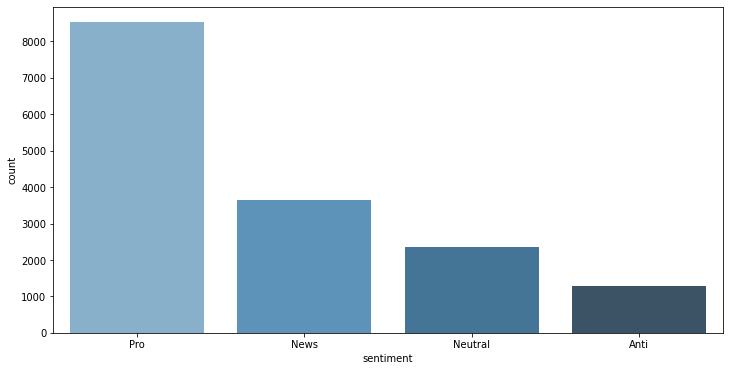

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df, palette="Blues_d")

(0.0, 100.0, 0.0, 100.0)

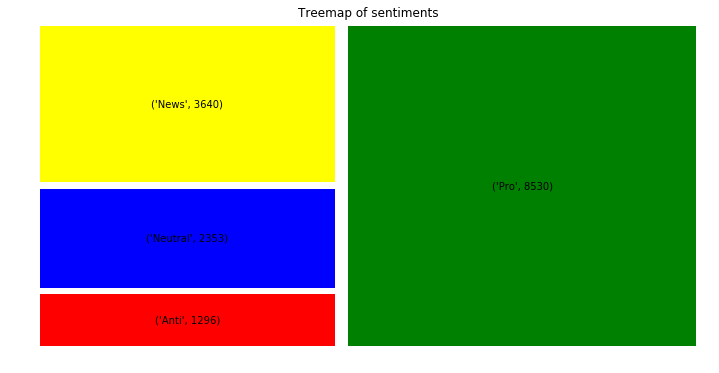

In [ ]:
import squarify
# plot arguments
sizes = sentiment_counts.counts.to_list()
np.random.seed(seed=12345)
color = plt.cm.Dark2(np.random.rand(len(sizes)))
label = list(zip(sentiment_counts.sentiment, sentiment_counts.counts))

# treemap plot
plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, 
              color=['red','blue','yellow','green'], 
              label=label, 
              pad=True)

# labels
plt.title('Treemap of sentiments')
plt.axis('off')

# Emoji Frequency

In [ ]:
# Instantiate DeepMoji model
emoji_model = DeepMoji()

## Generating the emoji cloud

In [ ]:
# Wrapper class to generate EmojiCloud

class EmojiCloud:
    def __init__(self,
                 font_path='Symbola.ttf',
                 color='blue'):
        self.font_path = font_path
        self.color = color
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

    def initialize_wordcloud(self):
        word_cloud = WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='black',
                               random_state=42,
                               collocations=False)
        return word_cloud

    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = {
            'yellow': '42, 88%',
            'blue': '194, 49%',
            'green': '159, 42%',
            'grey': '45, 2%'
        }.get(self.color)

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.20:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, emojis):
        emoji_frequencies = Counter(emojis)
        total_count = len(emojis)
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42),
                   interpolation="bilinear")
        plt.axis("off")

In [ ]:
# Set figure size for EmojiCloud
plt.rcParams["figure.figsize"] = (17, 6)

In [ ]:
train.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Predict emojis for the responses on Train Dataset

In [ ]:
emojis = emoji_model.predict(train['message'])

# Generate the emojicloud on Train Data

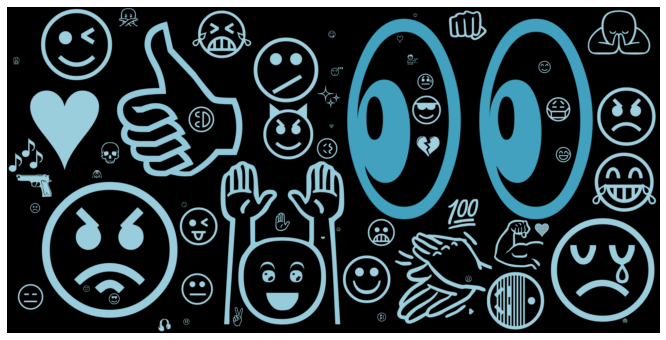

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emojis)

# Emoji Cloud Sentiment wise

In [ ]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 1 :
          sentiment_class.append('Pro')
      elif i == 0 :
          sentiment_class.append('Neutral')
      elif i == -1 :
          sentiment_class.append('Anti')
      else :
          sentiment_class.append('News')

  df['sentiment'] = sentiment_class
    
  return df
df_cloud = sentiment(train)
df_cloud.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Emoji cloud on Pro tweets

In [ ]:
filt_Pro =(df_cloud['sentiment']=='Pro')
df_1=df_cloud[filt_Pro]


## Filter Pro tweets into a new dataframe

In [ ]:
df_1.head(3)

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736


## Predict Emojis for response

In [ ]:
emojis_Pro = emoji_model.predict(df_1['message'])

# generate emoji

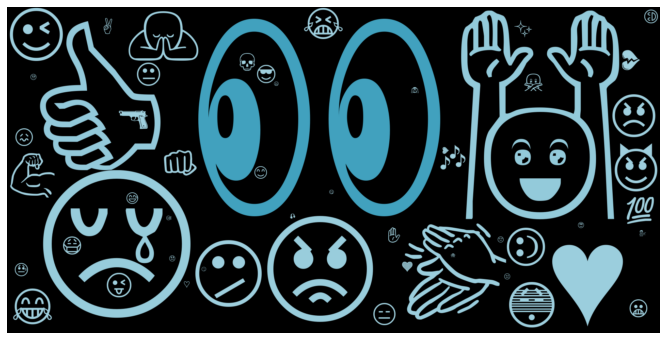

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emojis_Pro)

In [ ]:
filt_Neutral =(df_cloud['sentiment']=='Neutral')
df_2=df_cloud[filt_Neutral]


# Emoji cloud on N


In [ ]:
df_2.head(3)

,sentiment,message,tweetid
19,Neutral,Calum: *tweets abt reunitingish w the cast*\n-...,547924
22,Neutral,"we also met this guy, he let us in on some tru...",67545
30,Neutral,@Jnp_Ftw are these the same scientists that de...,365051


In [ ]:
emojis_Neutral = emoji_model.predict(df_2['message'])

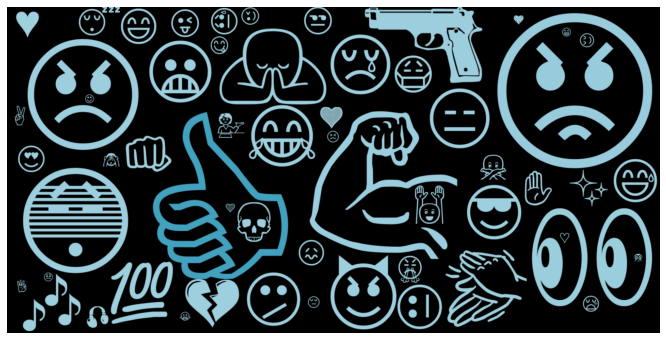

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emojis_Neutral)

In [ ]:
filt_Anti =(df_cloud['sentiment']=='Anti')
df_3=df_cloud[filt_Anti]

In [ ]:
df_3.head(3)

,sentiment,message,tweetid
28,Anti,Sally Kohn’s latest evidence of climate change...,355491
46,Anti,@realDonaldTrump Carbon Tax is a Globalist ide...,61141
48,Anti,RT @SteveSGoddard: We had winds close to 100 M...,719523


In [ ]:
emojis_Anti = emoji_model.predict(df_3['message'])

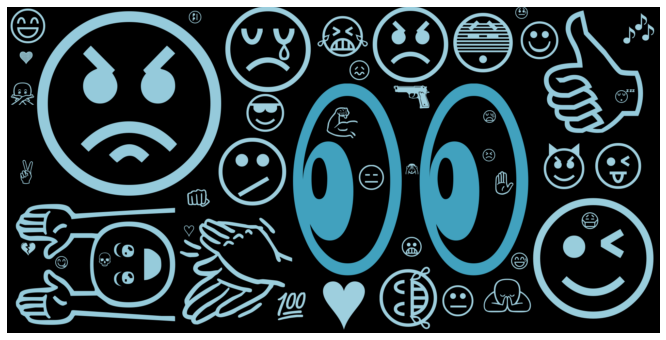

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emojis_Anti)

In [ ]:
filt_News =(df_cloud['sentiment']=='News')
df_4=df_cloud[filt_News]

In [ ]:
df_4.head(3)

,sentiment,message,tweetid
2,News,RT @RawStory: Researchers say we have three ye...,698562
12,News,RT @tveitdal: We only have a 5 percent chance ...,454673
14,News,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092


In [ ]:
emojis_News = emoji_model.predict(df_4['message'])

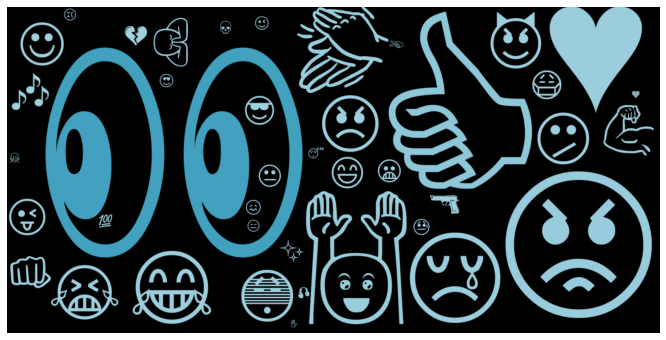

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emojis_News)

### Word Frequency

We want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [ ]:
from wordcloud import WordCloud

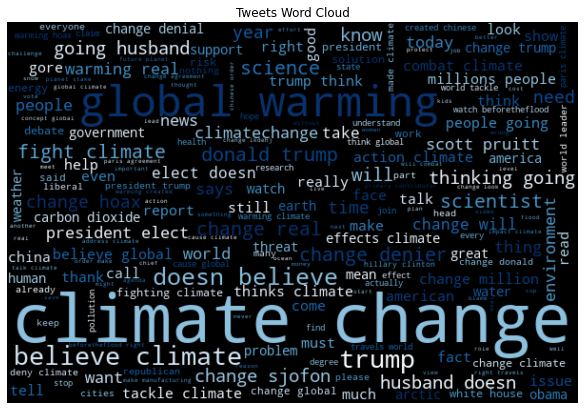

In [ ]:
# plot word cloud
allWords = ' '.join( [mssg for mssg in df['message']] )
wordCloud = WordCloud(width = 600, height=400, random_state = 21,colormap='Blues', max_font_size = 110).generate(allWords)
plt.figure(figsize=(17,7))
plt.title('Tweets Word Cloud')
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

# Popular Words on Train dataset

In [ ]:
#most common words in target selected colun
import collections
df['temp_list'] = df['message'].apply(lambda x:str(x).split())
top = collections.Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,climate,13039
1,change,12716
2,global,3797
3,warming,3543
4,trump,2419
5,about,1811
6,that,1738
7,believe,1160
8,this,1126
9,with,1002


In [ ]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Tweets', orientation='h', width=700, height=700)
fig.show()

# Common words sentiment wise

In [ ]:
#most common words Sentiment wise
Pro = df[df['sentiment']=='Pro']
News = df[df['sentiment']=='News']
Neutral = df[df['sentiment']=='Neutral']
Anti =df[df['sentiment']=='Anti']

# common words in Pro Tweets

These are the most commonly used words in tweets supporting that belief of man-made climate change.

In [ ]:
#MosT common positive words based on sentiment
top = collections.Counter([item for sublist in Pro['temp_list'] for item in sublist])
pro_tweet = pd.DataFrame(top.most_common(20))
pro_tweet.columns = ['Common_words','count']
pro_tweet.style.background_gradient(cmap='Reds')

,Common_words,count
0,climate,7417
1,change,7259
2,global,1605
3,warming,1466
4,about,1154
5,trump,1108
6,that,1089
7,believe,1005
8,doesn,769
9,this,762


In [ ]:
fig = px.bar(pro_tweet, x="count", y="Common_words", title='Commmon used words in Pro tweet', orientation='h', 
             width=700, height=700)
fig.show()

# common words in News Tweets

These are the most commonly used words in tweets that link to factual news about climate change

In [ ]:
#MosT common News tweets based on sentiment
top = collections.Counter([item for sublist in News['temp_list'] for item in sublist])
News_tweet = pd.DataFrame(top.most_common(20))
News_tweet.columns = ['Common_words','count']
News_tweet.style.background_gradient(cmap='Greens')

,Common_words,count
0,climate,3358
1,change,3272
2,trump,1068
3,global,511
4,warming,443
5,from,252
6,says,241
7,with,189
8,scientists,180
9,over,171


In [ ]:
fig = px.bar(News_tweet, x="count", y="Common_words", title='Most Commmon used in News tweet', orientation='h', 
             width=700, height=700)
fig.show()

# common words in Anti Tweets

These are the most commonly used words in tweets that does not believe in man-made climate change

In [ ]:
#MosT common News tweets based on sentiment
top = collections.Counter([item for sublist in Anti['temp_list'] for item in sublist])
Anti_tweet = pd.DataFrame(top.most_common(20))
Anti_tweet.columns = ['Common_words','count']
Anti_tweet.style.background_gradient(cmap='Purples')

,Common_words,count
0,climate,811
1,change,765
2,global,641
3,warming,621
4,that,180
5,about,167
6,this,109
7,with,91
8,made,91
9,they,87


In [ ]:
fig = px.bar(Anti_tweet, x="count", y="Common_words", title='Most Commmon Anti tweets', orientation='h', 
             width=700, height=700)
fig.show()

### Number of characters present in each sentence
This look at the number of characters available in each tweet provided about climate change.

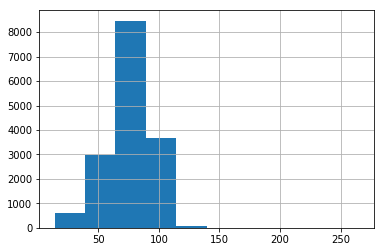

In [ ]:
#Plot a histogram to display number of characters that are in each tweet.
df['message'].str.len().hist()

The histogram shows that the number of the characters in these tweets range from 25 to 160 characters. Mostly, we notice that these tweets has more tweets that are between 75 to 150. 

### Number of Words showing in each Tweet is: 

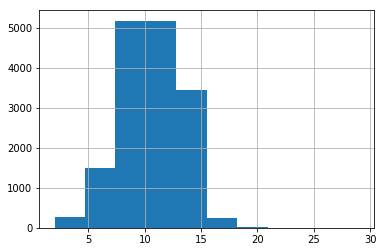

In [ ]:
# Counting the number of words that are in each tweet and plot the number using a histogram.
df['message'].str.split().map(lambda x: len(x)).hist()

count    15819.000000
mean        10.642898
std          2.555636
min          2.000000
25%          9.000000
50%         11.000000
75%         12.000000
max         29.000000
Name: message, dtype: float64


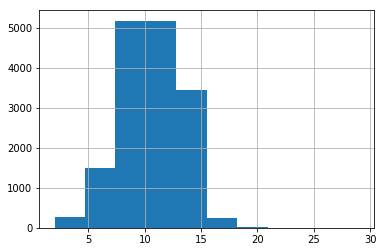

In [ ]:
# look into the description of available data. 
# Plot the histogram of the number of words in each tweet.

lens = df.message.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

We can see clearly that the number of words that appear in most of the tweets ranges from 2 to 31. Mostly, these words in these tweets are between 18 and 21. 

### Target Variable Distribution

### Tweet Length Distribution

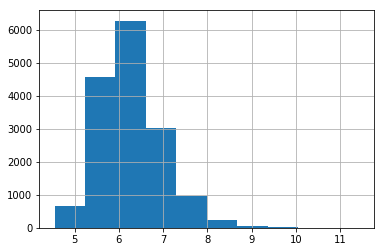

In [ ]:
# From the raw data: check the word lengths.
df['message'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

The average word length ranges from 3 to 15 with 4-6 being the most common lengths available in this dataset. It is important to note these words as they are very short words. English has many words considered as stop words that are mostly used into the language. These stopwords can include words such as 'there', 'this', 'the', 'a', 'an', 'are' etc. These words are very short in length from the plot thet might be the words that are contributing vastly to the graph being left-skewed.

Analysing the amount of stops words can provide us with some insights into the data we are dealing with.

From nltk library which consists of stopwords from different languages we can use corpus containing stops words.

### Stops words from the Tweets

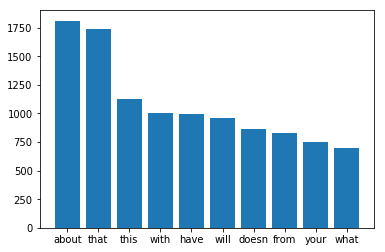

In [ ]:
# This code creates a function that look of the most occuring stop words in the tweets from the dataset
def plot_top_stopwords_barchart(text):
    # Find the stop words that are english from the corpus obtain from the nltk library. 
    stop=set(stopwords.words('english'))
    # Split the words from the tweets.
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    # Sort the stop words from the dictionary created and select the top 10 most occuring stop words.        
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
# plot the stop words from the dataset
plot_top_stopwords_barchart(df['message'])

We can definitely see that stopwords such as "to", "the", "of" and “is” dominate the climate change tweets. These stop words on the data preprocessing were removed from the tweets and below we can see the data with removed stop words:

In [ ]:
# View the cleaned data
df.head(10)

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags,temp_list
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),...","[polyscimajor, chief, doesn, think, carbon, di..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth...","[like, lack, evidence, anthropogenic, global, ..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)...","[researchers, have, three, years, climate, cha..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J...","[todayinmaker, wired, pivotal, year, climate, ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c...","[racist, sexist, climate, change, denying, big..."
5,Pro,worth read whether believe climate change ggl...,425577,NaN,False,"[worth, read, whether, believe, climate, chang...","[worth, read, whether, believe, climate, chang...","[(worth, JJ), (read, VBD), (whether, IN), (bel...","[worth, read, whether, believe, climate, chang..."
6,Pro,mike pence doesn believe global warming that s...,294933,NaN,False,"[mike, pence, doesn, believe, global, warming,...","[mike, pence, believe, global, warming, smokin...","[(mike, NN), (pence, NN), (believe, VBP), (glo...","[mike, pence, doesn, believe, global, warming,..."
7,Pro,things today fight climate change climate acti...,992717,NaN,False,"[things, today, fight, climate, change, climat...","[things, today, fight, climate, change, climat...","[(things, NNS), (today, NN), (fight, VBP), (cl...","[things, today, fight, climate, change, climat..."
8,Pro,nephew inconsolable wants like will perish fie...,664510,NaN,False,"[nephew, inconsolable, wants, like, will, peri...","[nephew, inconsolable, wants, like, perish, fi...","[(nephew, RB), (inconsolable, JJ), (wants, VBZ...","[nephew, inconsolable, wants, like, will, peri..."
9,Pro,offense like just believe global warming,260471,NaN,False,"[offense, like, just, believe, global, warming]","[offense, like, believe, global, warming]","[(offense, NN), (like, IN), (believe, VBP), (g...","[offense, like, just, believe, global, warming]"


In [ ]:
# A view of the first 10 tweets after all the all the stop words have been removed. 
df.message.head(10)

0    polyscimajor chief doesn think carbon dioxide ...
1      like lack evidence anthropogenic global warming
2    researchers have three years climate change be...
3    todayinmaker wired pivotal year climate change...
4    racist sexist climate change denying bigot lea...
5    worth read whether believe climate change  ggl...
6    mike pence doesn believe global warming that s...
7    things today fight climate change climate acti...
8    nephew inconsolable wants like will perish fie...
9             offense like just believe global warming
Name: message, dtype: object

### Climate Change Buzzwords

**Exploration of the Ngram**. Here we use the N-gram in expecting to obtain a better understanding of the context in which some of the words that occur frequently were used in the tweets. 

In [ ]:
# # Create function predicts the most probable word that might follow this sequence.
# def plot_top_ngrams_barchart(text, n=2):
#     # Find the stop words that are english from the corpus obtain from the nltk library.
#     stop=set(stopwords.words('english'))
#     # Split the words from the tweets.
#     new= text.str.split()
#     new=new.values.tolist()
#     corpus=[word for i in new for word in i]

#     def _get_top_ngram(corpus, n=None):
#         vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#         bag_of_words = vec.transform(corpus)
#         sum_words = bag_of_words.sum(axis=0) 
#         words_freq = [(word, sum_words[0, idx]) 
#                       for word, idx in vec.vocabulary_.items()]
#         words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#         return words_freq[:10]
#     # Select from the top 10 n-gram words. 
#     top_n_bigrams=_get_top_ngram(text,n)[:10]
#     x,y=map(list,zip(*top_n_bigrams))
#     sns.barplot(x=y,y=x)
# # Plot a bar graph of the of the two most probable words from the tweets about climate.
# plot_top_ngrams_barchart(df['message'],2)

In [ ]:
# # Plot a bar graph of the of the three most probable words from the tweets about climate.
# plot_top_ngrams_barchart(df['message'],3)

In [ ]:
# # Plot a bar graph of the of the four most probable words from the tweets about climate.
# plot_top_ngrams_barchart(df['message'],4)

In [ ]:
# # Plot a bar graph of the of the five most probable words from the tweets about climate.
# plot_top_ngrams_barchart(df['message'],5)

### Hashtags

### People, places and organizations to watch

**Named Entity Recognition** is used to extract informationof entities that are present in text data and normally classified into predifined entity types such as places, Person, Organizations etc. There are number of libraries that are available to do that such as 

- Standford NER
- spaCy
- NLTK

Here in this project we will be using **spaCy** which is an open-source library for advanced natural language processing tasks.

In [ ]:
import spacy

In [ ]:
# # Create a function that is capable of recognising the name entities from text data:
# def plot_most_common_named_entity_barchart(text, entity="PERSON"):
#     nlp = spacy.load("en_core_web_sm")
    
#     def _get_ner(text,ent):
#         doc=nlp(text)
#         return [X.text for X in doc.ents if X.label_ == ent]

#     entity_filtered=text.apply(lambda x: _get_ner(x,entity))
#     entity_filtered=[i for x in entity_filtered for i in x]
    
#     counter=Counter(entity_filtered)
#     x,y=map(list,zip(*counter.most_common(10)))
#     sns.barplot(y,x).set_title(entity)

In [ ]:
# from IPython.display import Image
# Image("../input/image-1/spacy_ner.png")

In [ ]:
# # Search for Countries, cities, states.
# plot_most_common_named_entity_barchart(df['message'], entity="PERSON")

In [ ]:
# # Search for people including fictional
# plot_most_common_named_entity_barchart(df['message'], entity="GPE")

In [ ]:
# # Search for EVENTS
# plot_most_common_named_entity_barchart(df['message'], entity="EVENT")

In [ ]:
# Which organisations and people that are mostly tackling these issues

# **Model Building: Sentimental Analysis**

Before we build these model, earlier we changed the sentiments into Pro, Neutral, Anti and News and now we need to change the code again to get the dataframe with sentiments that are numerical. Therefore:

In [ ]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 'Pro' :
          sentiment_class.append(1)
      elif i == 'Neutral' :
          sentiment_class.append(0)
      elif i == 'Anti' :
          sentiment_class.append(-1)
      else :
          sentiment_class.append(2)

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df_train1)
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags,temp_list
0,1,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),...","[polyscimajor, chief, doesn, think, carbon, di..."
1,1,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth...","[like, lack, evidence, anthropogenic, global, ..."
2,2,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)...","[researchers, have, three, years, climate, cha..."
3,1,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J...","[todayinmaker, wired, pivotal, year, climate, ..."
4,1,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c...","[racist, sexist, climate, change, denying, big..."


### Train-validation split

Splitting out the X variable from the target

In [ ]:
# Seperate features and tagret variables
y = train['sentiment']
X = train['message']

Turning text into something your model can read

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

### Pipeline

### Training the base model

Splitting the training data into a training and validation set

In [ ]:
# Split the train data to create validation dataset
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

Training the model and evaluating using the validation set 

In [ ]:
# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# rfc_pred = rfc.predict(X_val)

### Evaluate the Base Model Performance

Checking the performance of our model on the validation set

In [ ]:
# f1_score(y_val, rfc_pred, average="macro")

In [ ]:
# f1 = f1_score(y_val, rfc_pred, average="macro")

Getting our test set ready 

In [ ]:
# testx = test['message']
# test_vect = vectorizer.transform(testx)

Making predictions on the test set and adding a sentiment column to our original test df

In [ ]:
# y_pred = rfc.predict(test_vect)

In [ ]:
# test['sentiment'] = y_pred

# **Model Evaluation : Classifiers**

---



In [ ]:
# The classifiers that will be used in this work.

### Logistic regression

In [ ]:
# Fit Logistic Regression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
#lr_model = LogisticRegression(solver='lbfgs', max_iter=10000)
# lr_model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
# lr_model = LogisticRegression(C = 0.6, solver='lbfgs', max_iter=10000, class_weight='balanced')
#lr_model = LogisticRegression(C = 0.6, solver='lbfgs', max_iter=1000, class_weight='balanced', random_state =0)


lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Create a prediction set:
predictions = lr_model.predict(X_val)

# Print a confusion matrix
print(metrics.confusion_matrix(y_val,predictions))

[[  85   47  242   15]
 [   4  223  442   37]
 [   5   45 2370  139]
 [   5    8  310  769]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_val,predictions))

              precision    recall  f1-score   support

          -1       0.86      0.22      0.35       389
           0       0.69      0.32      0.43       706
           1       0.70      0.93      0.80      2559
           2       0.80      0.70      0.75      1092

    accuracy                           0.73      4746
   macro avg       0.76      0.54      0.58      4746
weighted avg       0.74      0.73      0.70      4746



In [ ]:
### Using the test data to test the logistic model
test_lr = test['message']
test_vect = vectorizer.transform(test_lr)

In [ ]:
# Predict the sentiment using the test data
y_pred = lr_model.predict(test_vect)

In [ ]:
# Assign a new column on the test data by using the predicted sentiment from the tweets from test data
test['sentiment'] = y_pred

In [ ]:
# Look into the data that will be submitted on Kaggle as csv
test[['tweetid','sentiment']].head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [ ]:
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('test_lr_submission.csv', index=False)

### Naive Bayes

In [ ]:
# Fit The Naive Bayes
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Create a prediction set:
pred_nb = nb_model.predict(X_val)

# Print a confusion matrix for NB Model
print(metrics.confusion_matrix(y_val,pred_nb))

[[  42    4  338    5]
 [   1   83  604   18]
 [   0    4 2482   73]
 [   0    2  505  585]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_val,pred_nb))

              precision    recall  f1-score   support

          -1       0.98      0.11      0.19       389
           0       0.89      0.12      0.21       706
           1       0.63      0.97      0.77      2559
           2       0.86      0.54      0.66      1092

    accuracy                           0.67      4746
   macro avg       0.84      0.43      0.46      4746
weighted avg       0.75      0.67      0.61      4746



In [ ]:
### Using the test data to test the Naive Bayes model
test_nb = test['message']
test_vect = vectorizer.transform(test_nb)

In [ ]:
# Predict the sentiment using the test data
y_pred_nb = nb_model.predict(test_vect)

In [ ]:
# Assign a new column on the test data by using the predicted sentiment from the tweets from test data
test['sentiment'] = y_pred_nb

In [ ]:
# Look into the data that will be submitted on Kaggle as csv
test[['tweetid','sentiment']].head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [ ]:
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('test_nb_submission.csv', index=False)

### Gradient Boosting Classifier

In [ ]:
# Fit Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [ ]:
# Create a prediction set:
pred_gb = gb_model.predict(X_val)

# Print a confusion matrix for NB Model
print(metrics.confusion_matrix(y_val,pred_gb))

[[ 126   51  194   18]
 [  18  237  403   48]
 [  39  139 2157  224]
 [   9   26  385  672]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_val,predictions))

              precision    recall  f1-score   support

          -1       0.86      0.22      0.35       389
           0       0.69      0.32      0.43       706
           1       0.70      0.93      0.80      2559
           2       0.80      0.70      0.75      1092

    accuracy                           0.73      4746
   macro avg       0.76      0.54      0.58      4746
weighted avg       0.74      0.73      0.70      4746



In [ ]:
# Using the test data to test the Gradient Boosting model
test_gb = test['message']
test_vect_gb = vectorizer.transform(test_gb)

In [ ]:
# Predict the sentiment using the test data
y_pred_gb = gb_model.predict(test_vect_gb)

In [ ]:
# Assign a new column on the test data by using the predicted sentiment from the tweets from test data
test['sentiment'] = y_pred_gb

In [ ]:
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('test_gb_submission.csv', index=False)

### Random forest

### K nearest neighbors

### Linear SVC

### Support Vector Machines

### Decision Tree Classifiers/Random Forests

*   List item
*   List item



### Linear Discriminant Analysis

# **Evaluating the Classifier for Selection**
- Classification Accuracy
- Logarithmic Loss
- Area Under ROC Curve (AUC)
- Confusion Matrix
- Classification Report


# **Hyperparameter tuning**

# **Submission**

Creating an output csv for submission

In [ ]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)

# **Conclusion**


# **Collaborators**

1. Malibongwe 
2. Orline Sorel
3. Lazola
4. Kundani
5. Lesedi

In [ ]:
# # Create dictionaries for the data we want to log

# params = {"preprocessing":  "_preprocess(df)",
#           "keeps username":"True",
#           "keeps hashtags":"True",
#           "keeps URL":"urlweb",
#           "removes puncutation":"string punctuation",
#           "use stopwords":"False",
#           "model_type": "LogisticRegression",
#           }


In [ ]:
params = {"random_state": 7,          
          "model_type": "model_lr",          
          "scaler": "standard scaler",
          "stratify": True}

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)

In [ ]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/lazolajavu/general/c9572c6f8ab64b06944af1e2103f20c0
COMET INFO:   Parameters:
COMET INFO:     model_type   : model_lr
COMET INFO:     random_state : 7
COMET INFO:     scaler       : standard scaler
COMET INFO:     stratify     : True
COMET INFO:   Uploads:
COMET INFO:     code                : 1 (30 KB)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO: ---------------------------
COMET ERROR: Error sending a notification, make sure you have opted-in for notifications
COMET INFO: Still uploading
COMET INFO: Still uploading
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Still uploadi

In [ ]:
experiment.display()